In [119]:
from google.colab import files
uploaded = files.upload()

Saving final_test.csv to final_test (1).csv


In [197]:
import matplotlib.pyplot as plt   
import matplotlib.style
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV


In [198]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['final_test.csv']))
print(data)

        weight   age  height size
0           62  28.0  172.72   XL
1           59  36.0  167.64    L
2           61  34.0  165.10    M
3           65  27.0  175.26    L
4           62  45.0  172.72    M
...        ...   ...     ...  ...
119729      63  42.0  175.26    M
119730      45  29.0  154.94    S
119731      61  31.0  172.72    M
119732      74  31.0  167.64   XL
119733      70  30.0  167.64   XL

[119734 rows x 4 columns]


There are over 1 lakh rows(exactly 119734) and 4 columns in the data.
 The 'size' column is the target variable.

In [199]:
data.head(5)

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [200]:
data.shape

(119734, 4)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


Observation:

*   Weight is an integer
*   age and height are float values
*   size is categorical   
 


In [202]:
data.describe(include="all")

,weight,age,height,size
count,119734.000000,119477.000000,119404.000000,119734
unique,NaN,NaN,NaN,7
top,NaN,NaN,NaN,M
freq,NaN,NaN,NaN,29712
mean,61.756811,34.027311,165.805794,NaN
std,9.944863,8.149447,6.737651,NaN
min,22.000000,0.000000,137.160000,NaN
25%,55.000000,29.000000,160.020000,NaN
50%,61.000000,32.000000,165.100000,NaN
75%,67.000000,37.000000,170.180000,NaN


In [203]:
(data['age']==0).sum()

18

In [204]:
data.loc[(data['age']==0)]

,weight,age,height,size
1261,56,0.0,170.18,S
7142,56,0.0,170.18,S
9146,56,0.0,165.10,M
9324,58,0.0,172.72,XL
22046,56,0.0,170.18,S
23593,77,0.0,177.80,XXXL
28626,58,0.0,172.72,M
34758,58,0.0,172.72,L
35313,70,0.0,160.02,XXXL
40653,53,0.0,157.48,XXS


In [205]:
(data['age']>100).sum()

34

In [206]:
data.loc[(data['age']>100)] 

,weight,age,height,size
8291,52,116.0,157.48,S
11096,47,117.0,152.40,XXS
15286,57,116.0,162.56,XXS
15640,56,116.0,165.10,M
23601,52,117.0,177.80,XXS
24987,57,116.0,162.56,XXS
28132,62,117.0,167.64,M
31159,52,117.0,165.10,M
41310,47,117.0,152.40,S
42564,65,117.0,170.18,M


In [207]:
(data['weight']<25).sum()

4

In [208]:
data.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

There are 257 null values in age and 330 null values in height.

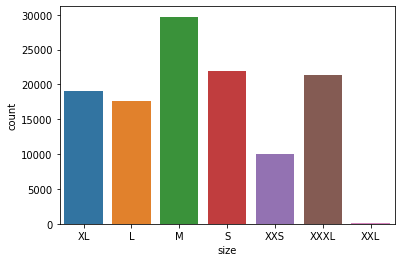

In [209]:
sns.countplot(data['size'])

#Drop null values

In [210]:
new_data = data.dropna(axis = 0, how = 'any')
print("Old dataframe length:",len(data))
print("New dataframe length:" ,len(new_data))
print("Nmuber of rows with alteast 1 null value:", len(data)-len(new_data))

Old dataframe length: 119734
New dataframe length: 119153
Nmuber of rows with alteast 1 null value: 581


As we have over 1 lakh rows it's ok to loose 581 rows with null value.

##Checking for incorrect values
Drop the columns where age == 0

In [211]:
new_data.drop(new_data.loc[new_data['age']==0].index,inplace=True)


In [212]:
new_data.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [213]:
new_data.loc[(new_data['age']==0)]

,weight,age,height,size


In [214]:
new_data.describe(include='all')

,weight,age,height,size
count,119135.000000,119135.000000,119135.000000,119135
unique,NaN,NaN,NaN,7
top,NaN,NaN,NaN,M
freq,NaN,NaN,NaN,29572
mean,61.756537,34.037856,165.806770,NaN
std,9.943234,8.138172,6.737816,NaN
min,22.000000,1.000000,137.160000,NaN
25%,55.000000,29.000000,160.020000,NaN
50%,61.000000,32.000000,165.100000,NaN
75%,67.000000,37.000000,170.180000,NaN


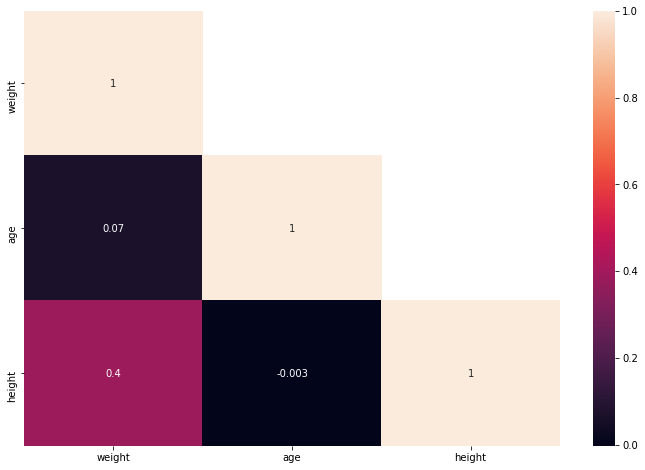

In [215]:
plt.figure(figsize=(12,8))
sns.heatmap(new_data.corr(),annot=True,fmt='.1g',mask=np.triu(new_data.corr(),+1))

Size is more dependent on weight compared to height and age.

In [216]:
data = pd.DataFrame(data)
data['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL'], dtype=object)

There are 7 different unique values in the target variable.

In [217]:
new_data.shape

(119135, 4)

#Feature Engineering

In [218]:
#copying the cleaned data into a new variable
data_feature = new_data.copy()

# Custom label encoding ordinal categorical variables
order_mapper = {'XXS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5,'XXL': 6, 'XXXL': 7}
cat_cols = ['size']
for i in cat_cols:
    data_feature[i] = data_feature[i].replace(order_mapper)

In [219]:
data_feature.head(10)

,weight,age,height,size
0,62,28.0,172.72,5
1,59,36.0,167.64,4
2,61,34.0,165.10,3
3,65,27.0,175.26,4
4,62,45.0,172.72,3
5,50,27.0,160.02,2
6,53,65.0,160.02,3
7,51,33.0,160.02,1
8,54,26.0,167.64,3
9,53,32.0,165.10,2


#Splitting Dataset into train and test

In [220]:
X = data_feature.drop('size',axis = 1)
y = data_feature['size']

In [221]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

In [222]:
X_train.head()

,weight,age,height
75403,52,60.0,162.56
16857,65,26.0,165.10
56847,53,40.0,154.94
48806,62,64.0,160.02
17932,81,39.0,177.80


In [223]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (95308, 3)
X_test:  (23827, 3)
y_train:  (95308,)
y_test:  (23827,)


In [224]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [225]:
dfs = []
sizes = []
for size_type in data['size'].unique():
    print('size type:',size_type)
    sizes.append(size_type)
    ndf = data[['age','height','weight']][data['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    dfs.append(zscore) 

size type: XL
size type: L
size type: M
size type: S
size type: XXS
size type: XXXL
size type: XXL


In [226]:
for i in range(len(dfs)):
    print(sizes[i])
    dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age']>-3) & (dfs[i]['age']<3)]
    dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height']>-3) & (dfs[i]['height']<3)]
    dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight']>-3) & (dfs[i]['weight']<3)]


XL
L
M
S
XXS
XXXL
XXL


#Linear Regression

In [227]:
from scipy.stats import zscore

import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [228]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:


print("The coefficient for weight is: ")
print(LR.coef_[0])
print("The coefficient for age is: ")
print(LR.coef_[1])
print("The coefficient for height is: ")
print(LR.coef_[2])

The coefficient for weight is: 
1.4937842341263896
The coefficient for age is: 
0.22565672858965358
The coefficient for height is: 
-0.08811756227050699


In [230]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [231]:
print(LR.coef_,LR.intercept_)

[ 1.49378423  0.22565673 -0.08811756] 3.8321232215553787


In [232]:
y_pred = LR.predict(X_test)

In [256]:
X_test[1]

array([ 2.41023574, -0.74212831,  1.4068207 ])

In [257]:
pred = LR.predict([[ 2.41023574, -0.74212831,  1.4068207 ]])
print(pred)

[7.14106351]


In [254]:
df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred})
df

,Actual value,Predicted value
38016,4,3
53003,7,7
52929,2,2
60650,2,3
88641,4,4
...,...,...
90563,7,7
85112,2,2
97464,4,1
118387,7,7


In [234]:
#check the accuracy scores for training and test set
print("Training Score ",LR.score(X_train,y_train))
print("Testing Score ",LR.score(X_test,y_test))

Training Score  0.6449151758906801
Testing Score  0.6499466096971149


In [235]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 1.217635239474146
Mean absolute Error: 0.8390392747335929


#Stochastic Gradient descent

In [259]:
from sklearn.linear_model import SGDClassifier

# creating the model
sgdc_model = SGDClassifier(penalty=None)

# feeding the training model into the model
sgdc_model.fit(X_train, y_train)

# predicting the values for the test set
y_pred = sgdc_model.predict(X_test)

In [260]:
print("Training Score ",sgdc_model.score(X_train,y_train))
print("Testing Score ",sgdc_model.score(X_test,y_test))

Training Score  0.42309145087505773
Testing Score  0.4266168632223948


#Decision Tree Classifier

In [239]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [240]:
#prediction
y_pred = classifier.predict(X_test)#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))


Accuracy Score: 0.5105972216393168


In [241]:
#check the accuracy scores for training and test set
print("Training Score ",classifier.score(X_train,y_train))
print("Testing Score ",classifier.score(X_test,y_test))

Training Score  0.5907059218533597
Testing Score  0.5105972216393168


In [242]:
DecisionTreeClassifierScore = classifier.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)


Accuracy obtained by Decision Tree Classifier model: 51.059722163931674


#Random forest classifier

In [243]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#check the accuracy scores for training and test set
print("Training Score ",clf.score(X_train,y_train))
print("Testing Score ",clf.score(X_test,y_test))


ACCURACY OF THE MODEL:  0.5165568472741008
Training Score  0.5906534603600957
Testing Score  0.5165568472741008


#K NN 

In [244]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights= 'distance')  
knn.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [245]:
#check the accuracy scores for training and test set
print("Training Score ",knn.score(X_train,y_train))
print("Testing Score ",knn.score(X_test,y_test))

Training Score  0.5598375792168548
Testing Score  0.4877659797708482


#XGBRF

In [171]:
from xgboost import XGBRFClassifier
modelXGBRF = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
modelXGBRF.fit(X_train,y_train)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.2,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.9, verbosity=1)

In [172]:
preds=modelXGBRF.predict(X_test)
preds

array([3, 7, 2, ..., 2, 7, 3])

In [173]:
XGBRFScore=modelXGBRF.score(X_test,y_test)
print("Accuracy obtained by XGBRF model:",XGBRFScore*100)

Accuracy obtained by XGBRF model: 48.9864439501406


In [174]:
print("Training Score ",modelXGBRF.score(X_train,y_train))
print("Testing Score ",modelXGBRF.score(X_test,y_test))

Training Score  0.48649641163386076
Testing Score  0.48986443950140596


In [261]:
#check the accuracy scores for training and test set
print("___________________LR____________________________")
print("\n")
print("Training Score ",LR.score(X_train,y_train))
print("Testing Score ",LR.score(X_test,y_test))
print("\n")
print("____________________decision tree_________________")
print("\n")
#check the accuracy scores for training and test set
print("Training Score ",classifier.score(X_train,y_train))
print("Testing Score ",classifier.score(X_test,y_test))
print("\n")
print("____________________random forest____________________")
print("\n")
#check the accuracy scores for training and test set
print("Training Score ",clf.score(X_train,y_train))
print("Testing Score ",clf.score(X_test,y_test))
print("\n")
print("___________________________knn____________________")
print("\n")
#check the accuracy scores for training and test set
print("Training Score ",knn.score(X_train,y_train))
print("Testing Score ",knn.score(X_test,y_test))
print("\n")
print("______________________XGBRF_______________________")
print("\n")
print("Training Score ",modelXGBRF.score(X_train,y_train))
print("Testing Score ",modelXGBRF.score(X_test,y_test))
print("\n")
print("_______________stochastic gradient descent _______________")
print("\n")
print("Training Score ",sgdc_model.score(X_train,y_train))
print("Testing Score ",sgdc_model.score(X_test,y_test))

___________________LR____________________________


Training Score  0.6449151758906801
Testing Score  0.6499466096971149


____________________decision tree_________________


Training Score  0.5907059218533597
Testing Score  0.5105972216393168


____________________random forest____________________


Training Score  0.5906534603600957
Testing Score  0.5165568472741008


___________________________knn____________________


Training Score  0.5598375792168548
Testing Score  0.4877659797708482


______________________XGBRF_______________________


Training Score  0.48649641163386076
Testing Score  0.48986443950140596


_______________stochastic gradient descent _______________


Training Score  0.42309145087505773
Testing Score  0.4266168632223948


#DEEP LEARNING

#Multilayer Perceptron MLP

In [175]:
from sklearn.neural_network import MLPClassifier

# creating the model
mlp_model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

# feeding the training data to the model
mlp_model.fit(X_train, y_train)

# calculating the accuracies
print("training accuracy :", mlp_model.score(X_train, y_train))
print("testing accuracy :", mlp_model.score(X_test, y_test))

training accuracy : 0.5211734586813279
testing accuracy : 0.5204599823729382


#Artificial Neural Networks

In [183]:
# datatype of y is object which ML model will not be able to understand and process.
# We will use LabelEncoder and to_categorical methods of sklearn and keras respectively to
# do one hot encoding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [184]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20 , random_state=1)

In [185]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [188]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(7, activation = 'relu', input_dim = 3))

# second hidden layer
model.add(Dense(7, activation = 'relu'))

# output layer
model.add(Dense(7, activation = 'softmax'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 
model.summary()
# earlystop is used to avoid overfitting of the model on training data.It is used to monitor
# the performence of the model during training.It allows us to choose the large number of epochs 
# and stop training once the model performence stop improving on the validation data

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose = 1, patience=20)
# fitting the model to training data
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=300, callbacks=[early_stop])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 7)                 28        
_________________________________________________________________
dense_34 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_35 (Dense)             (None, 7)                 56        
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
2979/2979 [==============================] - 10s 3ms/step - loss: 1.4596 - accuracy: 0.4102 - val_loss: 1.1386 - val_accuracy: 0.5000
Epoch 2/300
2979/2979 [==============================] - 9s 3ms/step - loss: 1.1407 - accuracy: 0.5115 - val_loss: 1.1275 - val_accuracy: 0.5143
Epoch 3/300
2979/2979 [==============================] - 9s 3ms/step - loss: 1.1347 - accuracy

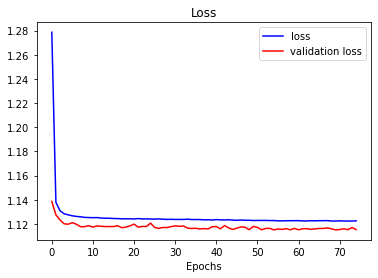

In [189]:
metrics = pd.DataFrame(model.history.history)
plt.plot(metrics['loss'], color='b',label='loss')
plt.plot(metrics['val_loss'], color='r',label='validation loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.title('Loss') 
plt.show()

#Saving the LR model into a pickle file

In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.externals import joblib
joblib.dump(LR, "LRmodel.pkl")


['LRmodel.pkl']

In [266]:
# Load model from file
classifer = joblib.load("LRmodel.pkl")